## Reklamlara Satış Geliri Tahminlemesi

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",100)
import numpy as np 

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
##from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor       

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


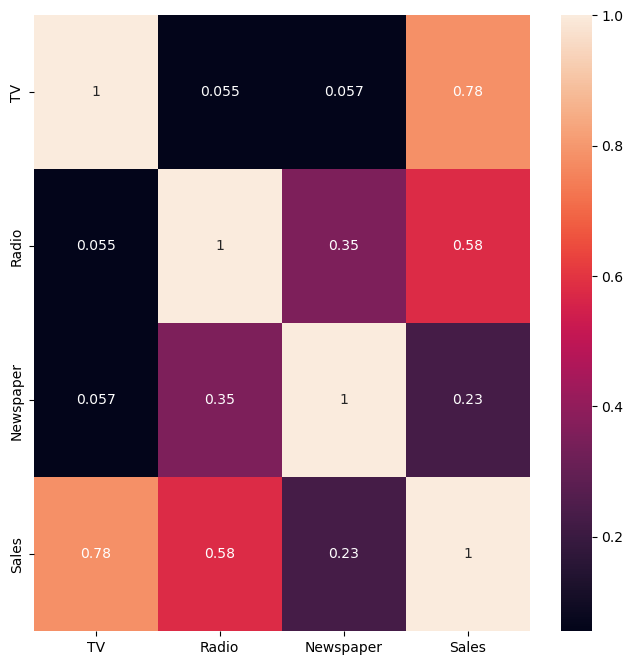

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True);

In [15]:
#%20 ile %90 arasındaki corelasyon değerleri alınır.
abs(df.corr()["Sales"].sort_values(ascending=False))

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

# Data Visualization (veri görselleştirme)
# Outlier 'ın Bulunması

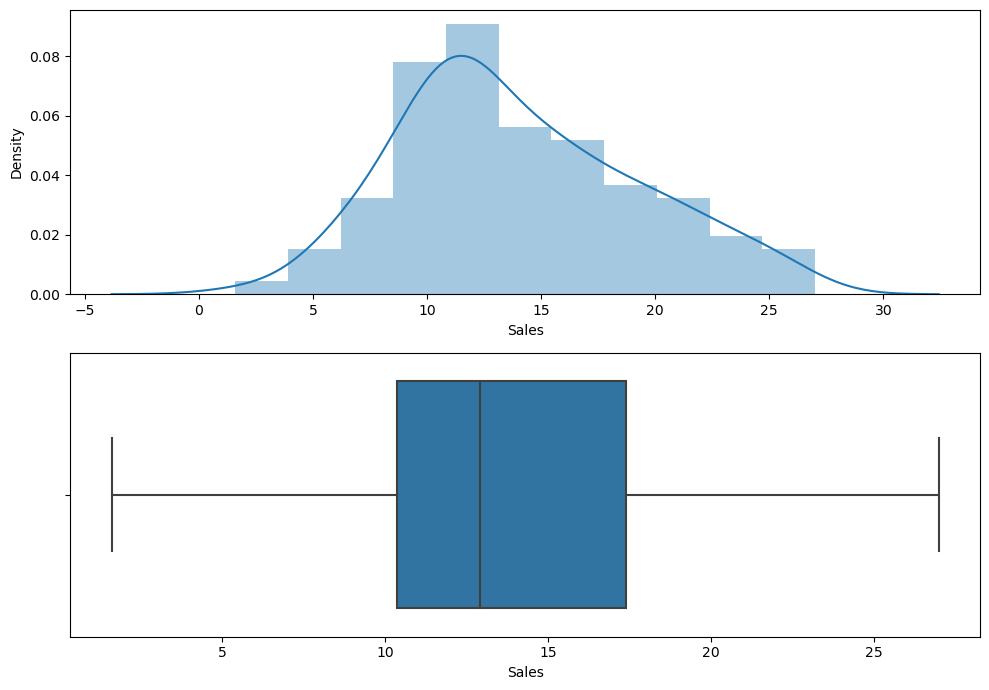

In [19]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['Sales'])
fig.add_subplot(2,1,2)
sns.boxplot(df['Sales'])
plt.tight_layout();

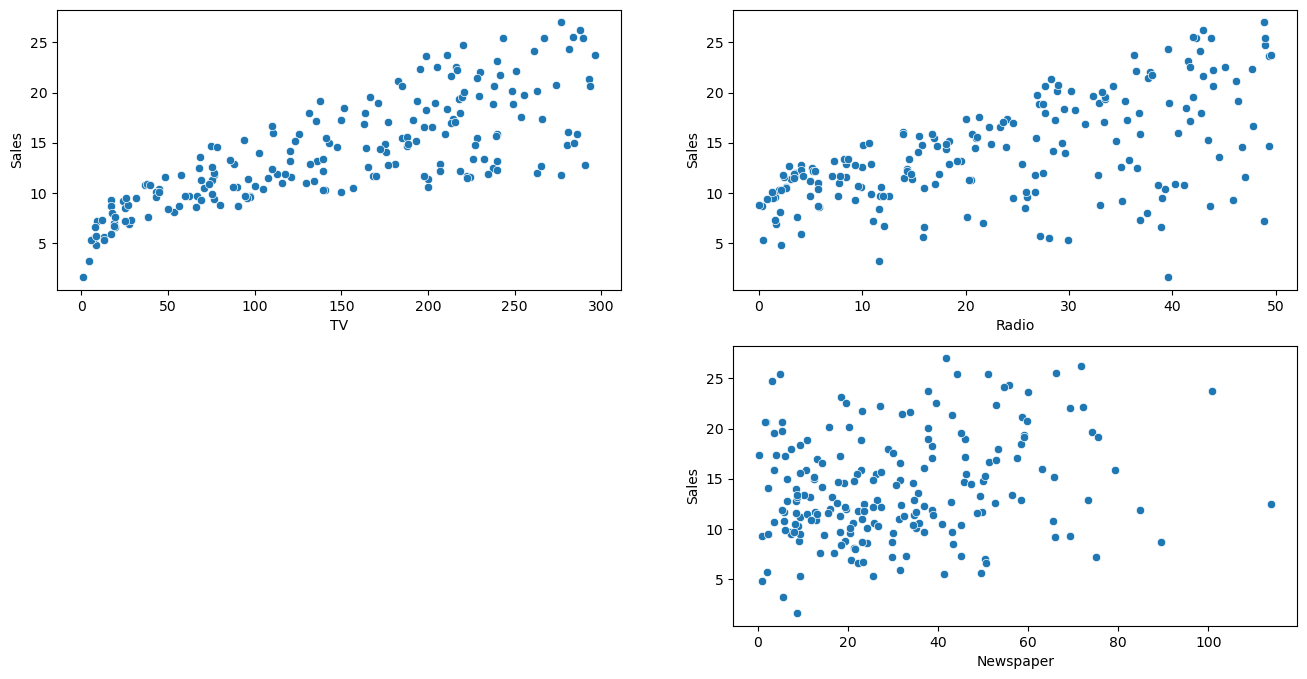

In [20]:
fig = plt.figure(figsize=(16,8))
fig.add_subplot(2,2,1)
sns.scatterplot(df['TV'], df['Sales'])
fig.add_subplot(2,2,2)
sns.scatterplot(df['Radio'],df['Sales'])
fig.add_subplot(2,2,4)
sns.scatterplot(df['Newspaper'],df['Sales']);

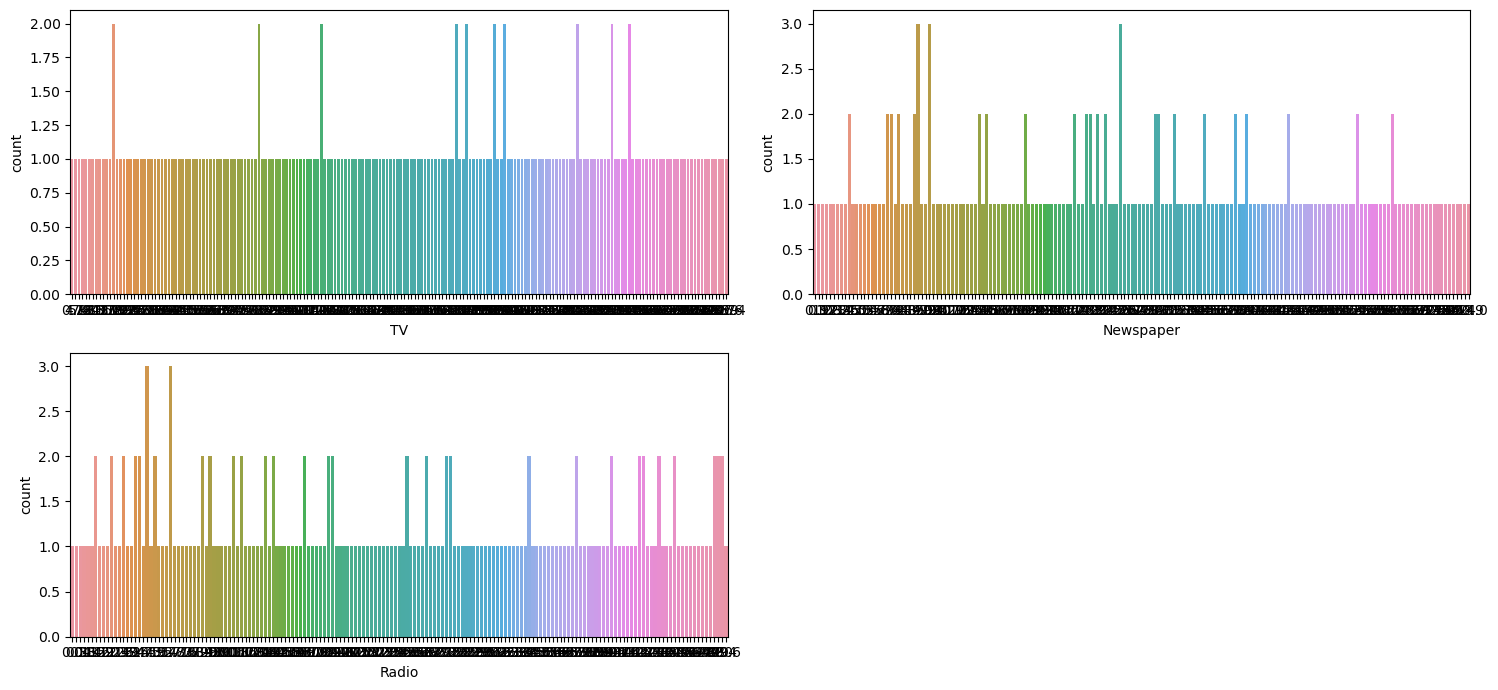

In [21]:
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(df['TV'])
fig.add_subplot(2,2,2)
sns.countplot(df['Newspaper'])
fig.add_subplot(2,2,3)
sns.countplot(df['Radio'])
plt.tight_layout()

## TV Reklamlarına Göre SAtış Başarı Oranı

In [86]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [127]:
#'TV','Newspaper','Radio'
x = df[['TV']]
y = df[['Sales']]

In [128]:
x=pd.get_dummies(x,drop_first=True)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)
model=lr.fit(x_train,y_train)
tahmin = model.predict(x_test)

In [129]:
tahmin_tv_mse=(mean_squared_error(tahmin,y_test))**0.5
tahmin_tv_r2=r2_score(tahmin,y_test)

In [130]:
print('Tv Tahmin mse"',tahmin_tv_mse)
print('Tv Tahmin r2"',tahmin_tv_r2)

Tv Tahmin mse" 3.194472431998898
Tv Tahmin r2" 0.4227436514531997


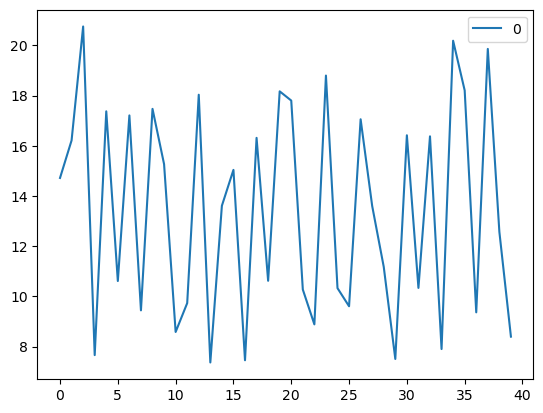

In [144]:
##sns.lineplot(data=tahmin);
##sns.lineplot(data=y_test, x="TV", y="TV", hue="event")
sns.lineplot(data=tahmin);

## Radio Reklamlarına Göre SAtış Başarı Oranı

In [71]:
#'TV','Newspaper','Radio'
x = df[['Radio']]
y = df[['Sales']]
x=pd.get_dummies(x,drop_first=True)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)

In [72]:
model=lr.fit(x_train,y_train)
tahmin = model.predict(x_test)

In [74]:
tahmin_radio_mse=(mean_squared_error(tahmin,y_test))**0.5
tahmin_radio_r2=r2_score(tahmin,y_test)

In [75]:
print('Radio Tahmin mse"',tahmin_radio_mse)
print('Radio Tahmin r2"',tahmin_radio_r2)

Radio Tahmin mse" 4.8216974799471926
Radio Tahmin r2" -1.5028989612552488


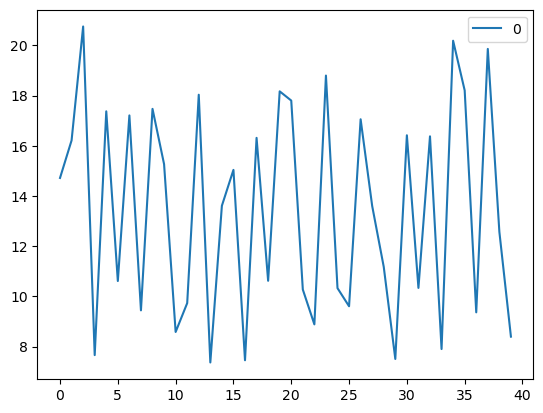

In [145]:
sns.lineplot(data=tahmin);

## Newspaper Reklamlarına Göre SAtış Başarı Oranı

In [82]:
#'TV','Newspaper','Radio'
x = df[['Newspaper']]
y = df[['Sales']]
x=pd.get_dummies(x,drop_first=True)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)
model=lr.fit(x_train,y_train)
tahmin = model.predict(x_test)

In [83]:
tahmin_Newspaper_mse=(mean_squared_error(tahmin,y_test))**0.5
tahmin_Newspaper_r2=r2_score(tahmin,y_test)

In [84]:
print('Newspaper Tahmin mse"',tahmin_Newspaper_mse)
print('Newspaper Tahmin r2"',tahmin_Newspaper_r2)

Newspaper Tahmin mse" 5.533600454969853
Newspaper Tahmin r2" -11.106066170529926


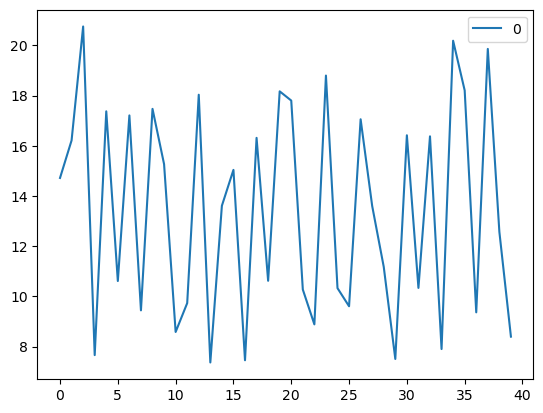

In [146]:
sns.lineplot(data=tahmin);

## 'TV','Newspaper','Radio' Reklamlarına Göre SAtış Başarı Oranı

In [123]:
x = df[['TV','Newspaper','Radio']]
y = df[['Sales']]
x=pd.get_dummies(x,drop_first=True)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)
model=lr.fit(x_train,y_train)
tahmin = model.predict(x_test)

In [124]:
tahmin_all_channel_mse=(mean_squared_error(tahmin,y_test))**0.5
tahmin_all_channel_r2=r2_score(tahmin,y_test)

In [125]:
print('All Channel Tahmin mse"',tahmin_all_channel_mse)
print('All Channel Tahmin r2"',tahmin_all_channel_r2)

All Channel Tahmin mse" 1.7815996615334506
All Channel Tahmin r2" 0.8791069137120033


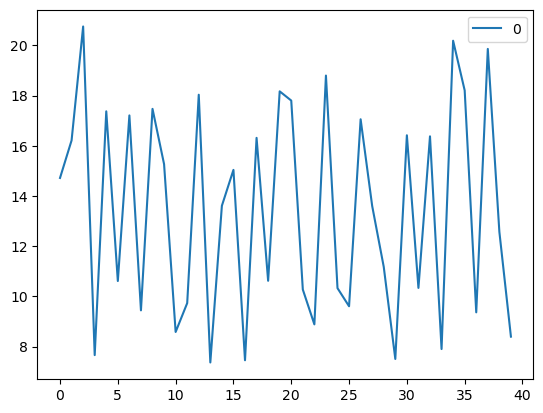

In [147]:
sns.lineplot(data=tahmin);

## Ridge ve Lasso ile Model Öğrenmesi

In [158]:
R = Ridge()
L = Lasso()
E = ElasticNet(l1_ratio = .8)
ETR = ExtraTreeRegressor()
GBR = GradientBoostingRegressor()
est = KNeighborsRegressor(n_neighbors = 10,weights = 'uniform')

In [159]:
def fnc_predict_all_model(x,y):
  
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
          
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
    
    algos = [L,E,R,Lass,ETR]
    algo_names = ['Linear','ElasticNet','Ridge','Lasso','Extra Tree']
    r_squared = []
    rmse = []
    mae = []
        
    result = pd.DataFrame(columns = ['R_Squared','RMSE','MAE'],index = algo_names)
       
    for algo in algos:
        algo.fit(x_train,y_train)
             
        r_squared.append(r2_score(y_test,algo.predict(x_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(x_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(x_test)))

    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE= mae
    
    return result.sort_values('R_Squared', ascending=False)

In [160]:
fnc_predict_all_model(x,y)

,R_Squared,RMSE,MAE
Linear,0.640600,3.294569,2.705212
Ridge,0.640600,3.294570,2.705212
ElasticNet,0.640395,3.295509,2.706792
Lasso,0.640206,3.296375,2.708232
Extra Tree,0.291237,4.626581,3.637500


In [163]:
x_mlr=fnc_predict_all_model(x,y)

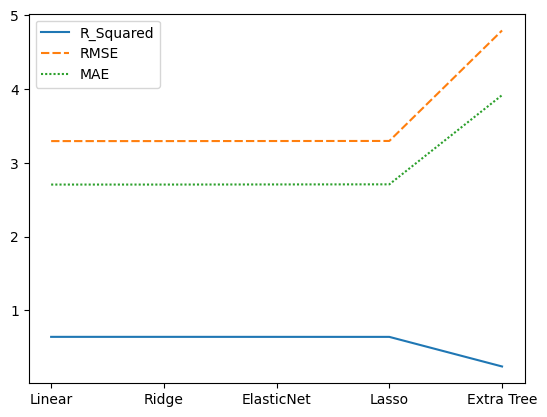

In [164]:
sns.lineplot(data=x_mlr);